<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/projects/car_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/hellbuoy/car-price-prediction/versions/1


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0].lower())

df.drop(columns=['CarName', 'symboling', 'fueltype', 'aspiration', 'doornumber'], inplace=True)

In [ ]:
brand_corrections = {
    'vw': 'volkswagen', 'vokswagen': 'volkswagen',
    'porcshce': 'porsche', 'toyouta': 'toyota', 'maxda': 'mazda'}

df['CarBrand'] = df['CarBrand'].replace(brand_corrections)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

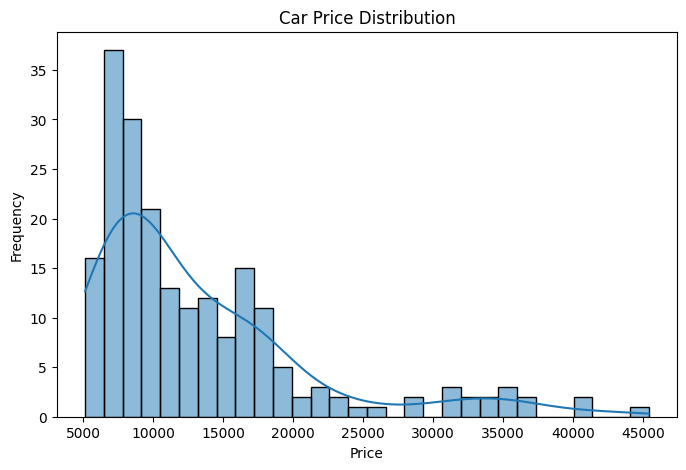

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

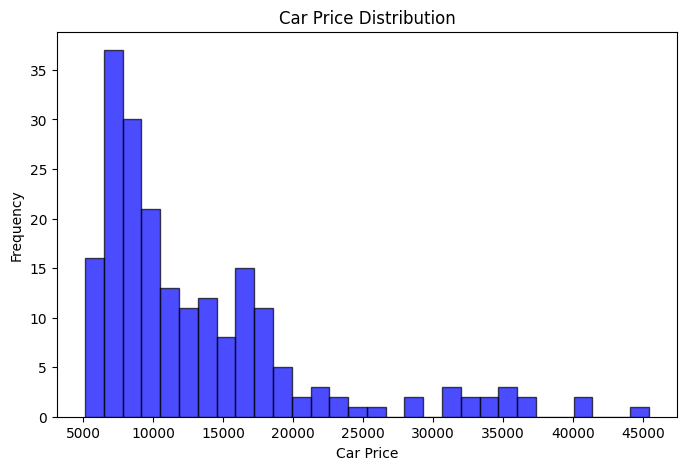

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.title("Car Price Distribution")
plt.show()

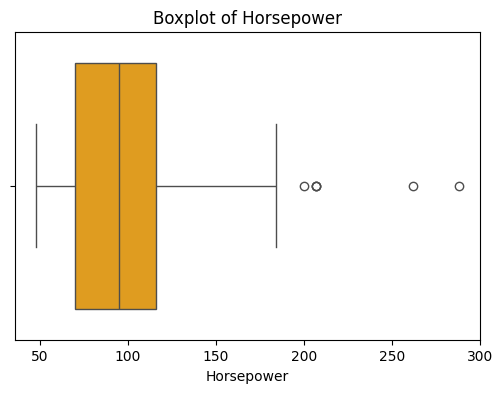

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['horsepower'], color='orange')
plt.xlabel("Horsepower")
plt.title("Boxplot of Horsepower")
plt.show()

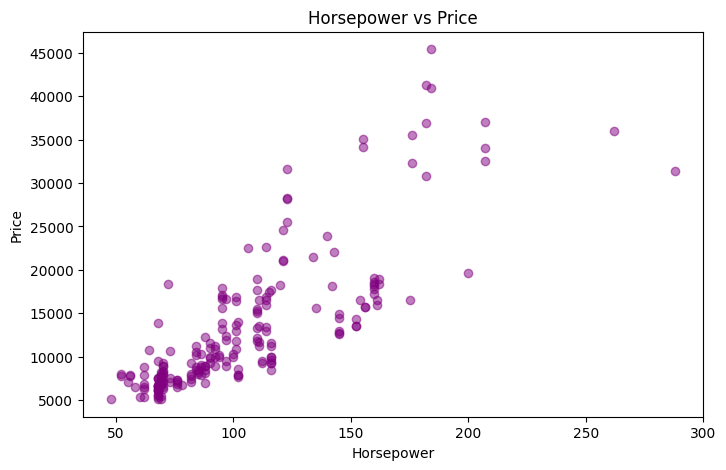

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['horsepower'], df['price'], alpha=0.5, color='purple')
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs Price")
plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:", categorical_cols)

Categorical Columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric Columns:", numeric_cols)

Numeric Columns: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


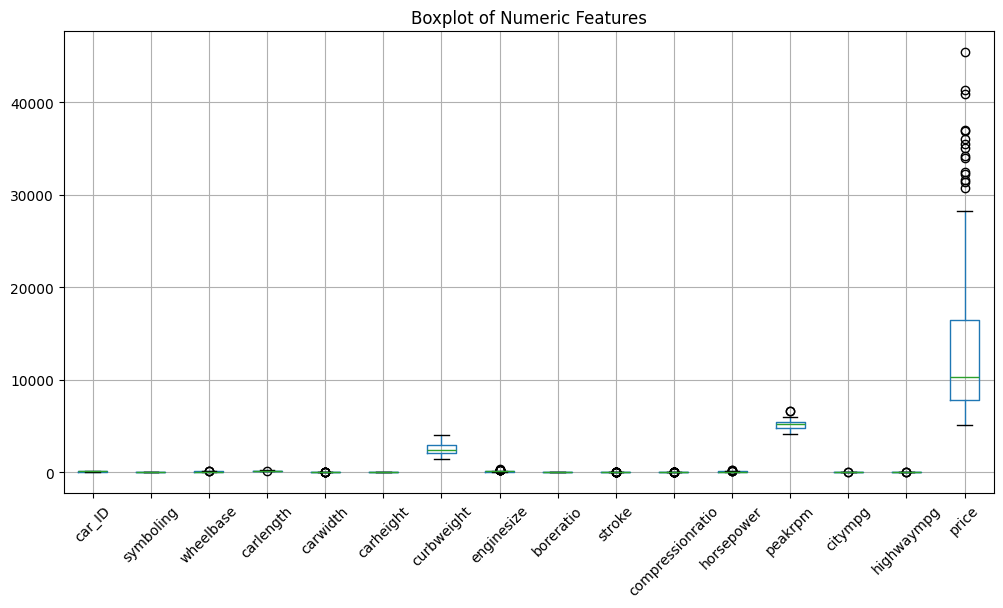

In [ ]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

print("Outliers removed using IQR method.")

Outliers removed using IQR method.


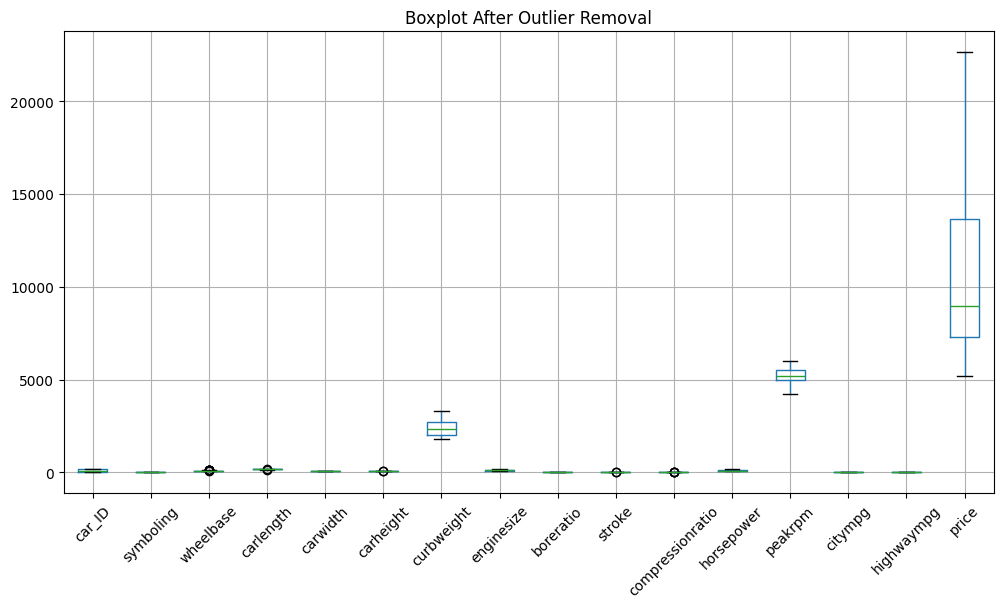

In [ ]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Removal")
plt.show()

In [ ]:
y = df['price']

X = df.drop(columns=['price'])

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols.remove('price')

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred)

print(f"Random Forest R² Score: {r2_lr:.4f}")

Random Forest R² Score: 0.1512


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf:.4f}")

Random Forest R² Score: 0.8881


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_pred_poly = lr.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Linear Regression R² Score: {r2_poly:.4f}")

Polynomial Linear Regression R² Score: -29.5169


In [ ]:
correlation_matrix = df.corr()
strong_features = correlation_matrix['price'].abs().sort_values(ascending=False).index.tolist()

strong_features.remove('price')

X = df[strong_features]

In [ ]:
df['price'] = np.log1p(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, df['price'], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_log = r2_score(y_test, y_pred)
print(f"Log-Transformed Linear Regression R² Score: {r2_log:.4f}")

Log-Transformed Linear Regression R² Score: 0.0399


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X_train_poly, y_train, cv=5, scoring='r2')

print(f"Cross-validated R² scores: {cv_scores}")
print(f"Average R² score from cross-validation: {cv_scores.mean():.4f}")

Cross-validated R² scores: [-26.605643    -3.90866111 -12.78448622 -51.84460468  -3.86986971]
Average R² score from cross-validation: -19.8027


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

y_pred_ridge = ridge.predict(X_test_poly)

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R² Score: {r2_ridge:.4f}")

Ridge Regression R² Score: 0.5990


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_poly, y_train)

y_pred_lasso = lasso.predict(X_test_poly)

r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression R² Score: {r2_lasso:.4f}")

Lasso Regression R² Score: 0.8662


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_poly, y_train)

best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_

print(f"Best Alpha: {best_alpha}")

Best Alpha: 0.01
